# **Vehicle Data Analysis**

#### *The "Vehicle Sales and Market Trends Dataset" provides a comprehensive collection of information pertaining to the sales transactions of various vehicles. This dataset encompasses details such as the year, make, model, trim, body type, transmission type, VIN (Vehicle Identification Number), state of registration, condition rating, odometer reading, exterior and interior colors, seller information, Manheim Market Report (MMR) values, selling prices, and sale dates.*

##### **The aim of this project is to do a descriptive analysis the car prices data.**

## **Understanding the Data**

In [2]:
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(9,5)
matplotlib.rcParams['figure.facecolor']= '#00000000'

In [4]:
vehicle_df = pd.read_csv('car_prices.csv')

In [5]:
# Define the bins and labels
bins = [0, 10, 20, 30, 40, 50]
labels = ['poor', 'bad', 'average', 'good', 'excellent']

# Create a new column for the condition categories
vehicle_df['condition_category'] = pd.cut(vehicle_df['condition'], bins=bins, labels=labels, right=False)


In [6]:
from datetime import datetime
current_year = datetime.now().year
# Calculate the age of the vehicle and create new column
vehicle_df['age'] = current_year - vehicle_df['year']
# Define age bins and labels
age_bins = [0, 5, 10, 15, 20, 100]
age_labels = ['0-5', '6-10', '11-15', '16-20', '20+']
# Create a new column for the age categories
vehicle_df['age_category'] = pd.cut(vehicle_df['age'], bins=age_bins, labels=age_labels, right=False)


In [7]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   year                558837 non-null  int64   
 1   make                548536 non-null  object  
 2   model               548438 non-null  object  
 3   trim                548186 non-null  object  
 4   body                545642 non-null  object  
 5   transmission        493485 non-null  object  
 6   vin                 558833 non-null  object  
 7   state               558837 non-null  object  
 8   condition           547017 non-null  float64 
 9   odometer            558743 non-null  float64 
 10  color               558088 non-null  object  
 11  interior            558088 non-null  object  
 12  seller              558837 non-null  object  
 13  mmr                 558799 non-null  float64 
 14  sellingprice        558825 non-null  float64 
 15  saledate         

In [8]:
vehicle_df.describe(include = 'all')

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,condition_category,age,age_category
count,558837.000000,548536,548438,548186,545642,493485,558833,558837,547017.000000,558743.000000,558088,558088,558837,558799.000000,558825.000000,558825,547017,558837.000000,558837
unique,NaN,96,973,1963,87,4,550297,64,NaN,NaN,46,17,14263,NaN,NaN,3766,5,NaN,4
top,NaN,Ford,Altima,Base,Sedan,automatic,automatic,fl,NaN,NaN,black,black,nissan-infiniti lt,NaN,NaN,Tue Feb 10 2015 01:30:00 GMT-0800 (PST),good,NaN,11-15
freq,NaN,93554,19349,55817,199437,475915,22,82945,NaN,NaN,110970,244329,19693,NaN,NaN,5334,161676,NaN,356586
mean,2010.038927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.672365,68320.017767,NaN,NaN,NaN,13769.377495,13611.358810,NaN,NaN,13.961073,NaN
std,3.966864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.402832,53398.542821,NaN,NaN,NaN,9679.967174,9749.501628,NaN,NaN,3.966864,NaN
min,1982.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,25.000000,1.000000,NaN,NaN,9.000000,NaN
25%,2007.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,28371.000000,NaN,NaN,NaN,7100.000000,6900.000000,NaN,NaN,11.000000,NaN
50%,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,52254.000000,NaN,NaN,NaN,12250.000000,12100.000000,NaN,NaN,12.000000,NaN
75%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.000000,99109.000000,NaN,NaN,NaN,18300.000000,18200.000000,NaN,NaN,17.000000,NaN


## **Data Cleaning**

#### *Removing nan/ empty values*

In [9]:
vehicle_df.dropna(inplace=True)

#### *Missing values*

In [10]:
print("Are there any missing values?", vehicle_df.isnull().values.any())

Are there any missing values? False


#### *Removing Duplicates*

In [11]:
vehicle_df.duplicated()
vehicle_df.drop_duplicates(inplace = True)

#### *Removing trailing and leading whitespaces*

In [12]:
# Assuming vehicle_df is your DataFrame containing the vehicle data
columns_to_strip = ['make', 'model', 'trim', 'body', 'transmission', 'color', 'interior', 'seller']

# Strip leading and trailing whitespaces from the specified columns
for col in columns_to_strip:
    if vehicle_df[col].dtype == 'object':
        vehicle_df[col] = vehicle_df[col].map(str.strip)


#### *Removing outliers and anomalies*

<Axes: ylabel='sellingprice'>

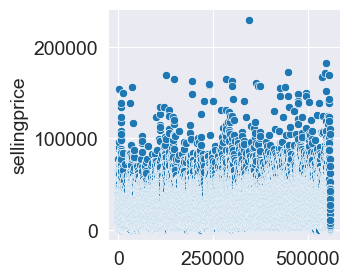

In [13]:
plt.figure(figsize=(3,3))
sns.scatterplot(vehicle_df.sellingprice)

In [14]:
vehicle_df.drop(vehicle_df[vehicle_df.sellingprice >200000].index, inplace = True)

In [15]:
vehicle_df.drop(vehicle_df[vehicle_df.interior == "—"].index, inplace = True)
vehicle_df.drop(vehicle_df[vehicle_df.color == "—"].index, inplace = True)

## **Exploratory Analysis and Visualisation**

#### *What is the distribution of vehicle ages in the dataset?*

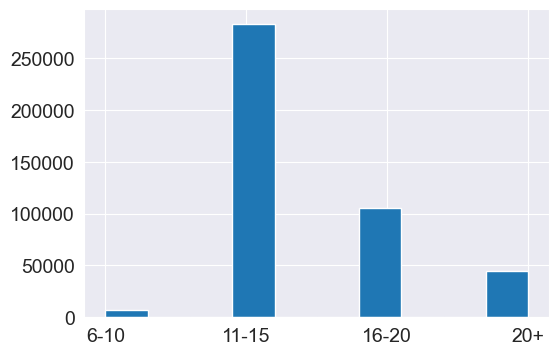

In [16]:
plt.figure(figsize = (6,4))
plt.hist(vehicle_df.age_category);

- ### Vehicles that are 11-15 years appear more in the dataset

#### *What is the distribution of vehicle interior and color on selling price?*

<Figure size 1000x600 with 0 Axes>

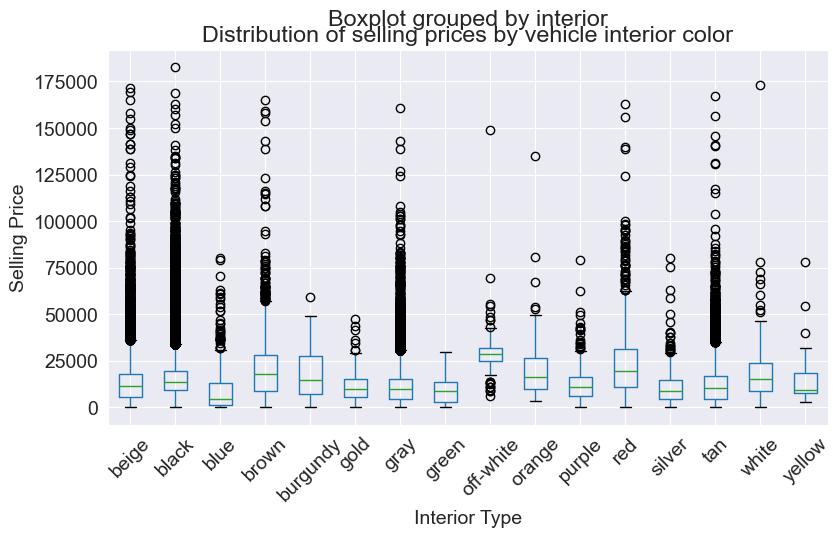

In [17]:
# Box plot of selling prices for each interior type
plt.figure(figsize=(10, 6))
vehicle_df.boxplot(column='sellingprice', by='interior')
plt.xlabel('Interior Type')
plt.ylabel('Selling Price')
plt.title('Distribution of selling prices by vehicle interior color')
plt.xticks(rotation=45)
plt.show()


<Figure size 1000x600 with 0 Axes>

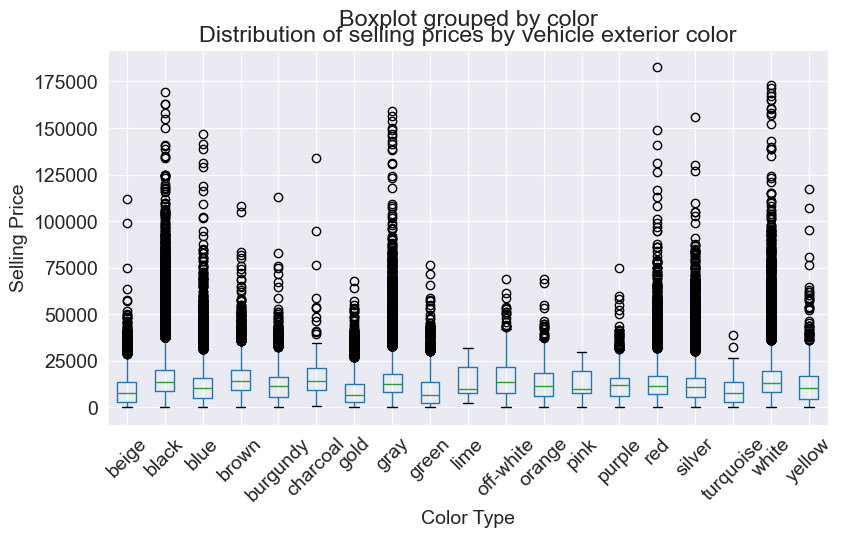

In [18]:
# Box plot of selling prices for each interior type
plt.figure(figsize=(10, 6))
vehicle_df.boxplot(column='sellingprice', by='color')
plt.xlabel('Color Type')
plt.ylabel('Selling Price')
plt.title('Distribution of selling prices by vehicle exterior color')
plt.xticks(rotation=45)
plt.show()


- #### *The color "red" has a taller box plot (larger IQR) compared to other colors in your dataset, indicating a wider spread of selling prices for vehicles with that color. However, this does not necessarily mean that the average selling price for red vehicles is higher than charcoal or black.*

#### *Statisical Analysis*

In [19]:
vehicle_df.describe()

,year,condition,odometer,mmr,sellingprice,age
count,440392.000000,440392.000000,440392.000000,440392.000000,440392.000000,440392.000000
mean,2010.135475,30.613887,67674.046749,13645.953208,13499.497938,13.864525
std,3.834401,13.235135,52151.342065,9435.663898,9509.301999,3.834401
min,1990.000000,1.000000,1.000000,25.000000,1.000000,9.000000
25%,2008.000000,23.000000,28808.750000,7250.000000,7000.000000,11.000000
50%,2012.000000,34.000000,52490.000000,12150.000000,12000.000000,12.000000
75%,2013.000000,41.000000,97900.250000,18050.000000,18000.000000,16.000000
max,2015.000000,49.000000,999999.000000,182000.000000,183000.000000,34.000000


#### *Correlation*

In [20]:
numerical_columns = ['condition','odometer', 'mmr', 'sellingprice']
correlation_matrix = vehicle_df[numerical_columns].corr()
print(correlation_matrix)

              condition  odometer       mmr  sellingprice
condition      1.000000 -0.306886  0.272379      0.314051
odometer      -0.306886  1.000000 -0.583004     -0.577793
mmr            0.272379 -0.583004  1.000000      0.983976
sellingprice   0.314051 -0.577793  0.983976      1.000000


              condition  odometer       mmr  sellingprice       age
condition      1.000000 -0.306886  0.272379      0.314051 -0.325070
odometer      -0.306886  1.000000 -0.583004     -0.577793  0.770917
mmr            0.272379 -0.583004  1.000000      0.983976 -0.590836
sellingprice   0.314051 -0.577793  0.983976      1.000000 -0.580874
age           -0.325070  0.770917 -0.590836     -0.580874  1.000000


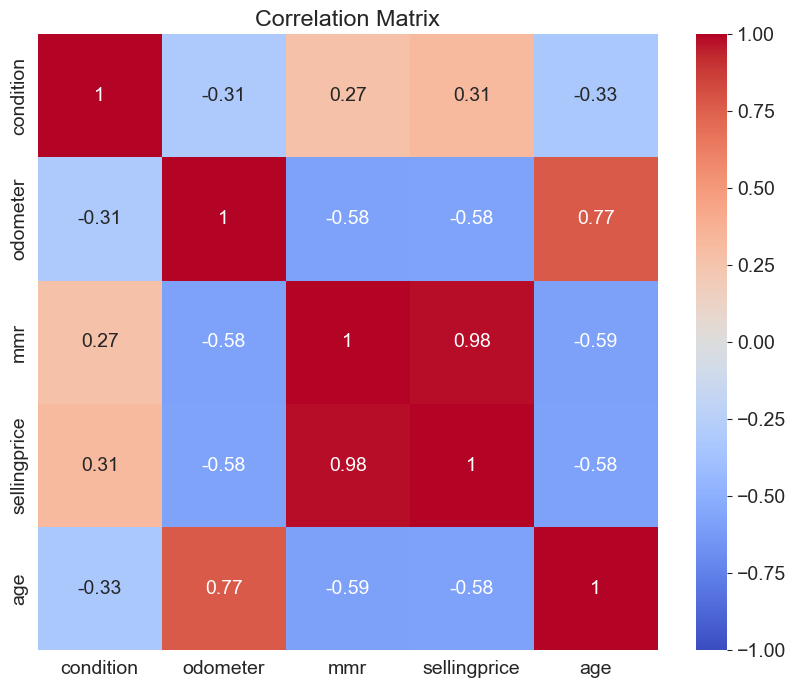

In [24]:
# Select only the numeric columns
numeric_df = vehicle_df.select_dtypes(include='number')

# Drop the 'year' column from the numeric dataframe
numeric_df = numeric_df.drop('year', axis=1)

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

- Condition vs. Odometer (-0.306886): Negative correlation.
Vehicles in better condition tend to have lower mileage.
- Condition vs. MMR (0.272379): Positive correlation.
Vehicles in better condition tend to have a higher MMR (Manheim Market Report) value.
- Condition vs. Selling Price (0.314051): Positive correlation.
A weak positive correlation indicates that, although both variables (selling price and condition) tend to go up in response to one another, the relationship is not very strong. 
- Odometer vs. MMR (-0.583004): Negative correlation.
Vehicles with higher mileage tend to have lower MMR values.
- Odometer vs. Selling Price (-0.577793): Negative correlation.
Vehicles with higher mileage tend to have lower selling prices.
- MMR vs. Selling Price (0.983976): Strong positive correlation.
Vehicles with higher MMR values tend to have higher selling prices.

Conclusion
- The correlation matrix provides a snapshot of how these variables are related. High mileage tends to negatively impact both the market value and selling price. MMR, as a market valuation metric, aligns very closely with actual selling prices, showing that it is a reliable indicator in this dataset.

#### *Price Variation By Condition*

In [22]:
vehicle_df.condition.unique()

array([ 5., 45., 41., 43.,  1., 34.,  2., 42.,  3., 48., 49., 17., 19.,
       29., 38., 44., 47., 32.,  4., 25., 37., 39., 31., 28., 46., 35.,
       26., 21., 36., 22., 27., 24., 33., 23., 16., 18., 12., 14., 11.,
       13., 15.])

In [23]:
vehicle_df.groupby('condition')['sellingprice'].mean()

condition
1.0      4074.390876
2.0      5945.603705
3.0     12472.765965
4.0     17580.392321
5.0     24424.972300
11.0     4164.054054
12.0     3938.855422
13.0     3438.732394
14.0     3142.342342
15.0     3927.433628
16.0     4610.563380
17.0     4364.500000
18.0     4630.200730
19.0     5063.951146
21.0     7222.930402
22.0     7563.317802
23.0     7953.504046
24.0     8243.944859
25.0     8723.594434
26.0     9029.267767
27.0     9549.666741
28.0     9985.770590
29.0    10534.335711
31.0    11461.699774
32.0    11691.122640
33.0    12048.799286
34.0    12531.409390
35.0    13162.842161
36.0    13793.895518
37.0    14665.103502
38.0    15217.223263
39.0    15743.191906
41.0    17020.919033
42.0    17689.208196
43.0    18271.093545
44.0    18981.580921
45.0    19684.024378
46.0    20253.505983
47.0    20780.642956
48.0    21247.902431
49.0    22540.527995
Name: sellingprice, dtype: float64

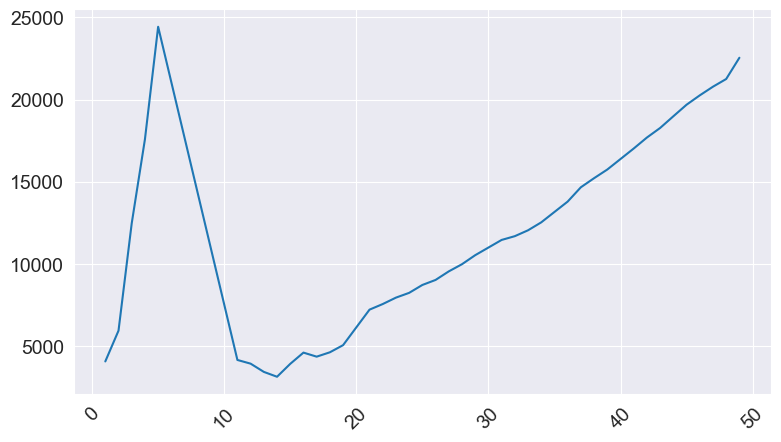

In [86]:
plt.xticks(rotation = 45)
plt.plot(vehicle_df.groupby('condition')['sellingprice'].mean());

- #### *There is not significant relationship between price and condition*

#### *GeoSpatial Analysis*

In [87]:
vehicle_df.groupby('state')['sellingprice'].mean()

state
al     9440.000000
az    12177.959947
ca    14641.523253
co    15647.669595
fl    14189.645003
ga    12770.016460
hi    12320.611702
il    15450.910366
in    10983.723349
la    11224.465130
ma     6801.042180
md     7708.266985
mi    15201.664428
mn    13884.894634
mo    14534.128814
ms    10896.764706
nc     8709.290607
ne    13239.337137
nj    13284.379003
nm     7102.816901
nv    16308.754582
ny    12617.777280
oh    13932.803053
ok     7438.461538
or    11957.675439
pa    13977.999222
pr     9706.006628
sc    10706.250000
tn    16728.006972
tx    13387.927968
ut    12535.176505
va     8378.253803
wa    14304.316574
wi    13800.226457
Name: sellingprice, dtype: float64

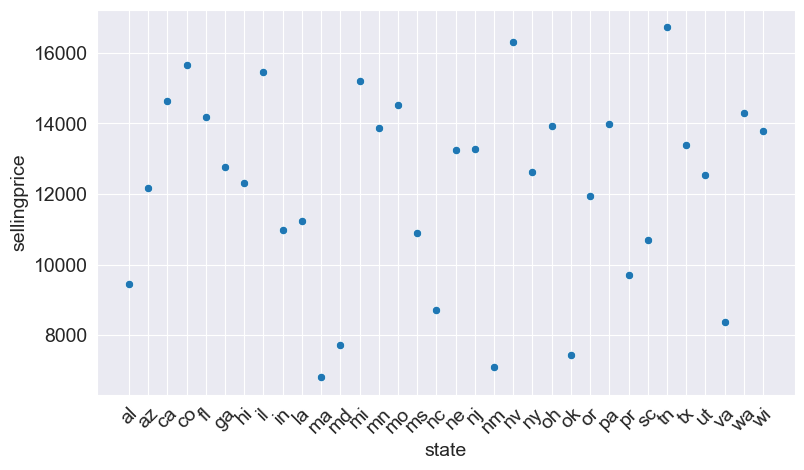

In [88]:
plt.xticks(rotation = 45)
sns.scatterplot(vehicle_df.groupby('state')['sellingprice'].mean());

- Tennessee has the highest average sales

#### *Yearly distribution of selling price*

In [89]:
vehicle_df.groupby('year')['sellingprice'].count()

year
1990       30
1991       46
1992       87
1993      115
1994      257
1995      440
1996      530
1997      967
1998     1379
1999     2097
2000     3229
2001     4924
2002     7325
2003     9980
2004    13063
2005    16510
2006    20823
2007    24554
2008    26091
2009    17312
2010    21655
2011    38596
2012    79777
2013    80567
2014    62624
2015     7414
Name: sellingprice, dtype: int64

<Axes: xlabel='year', ylabel='count'>

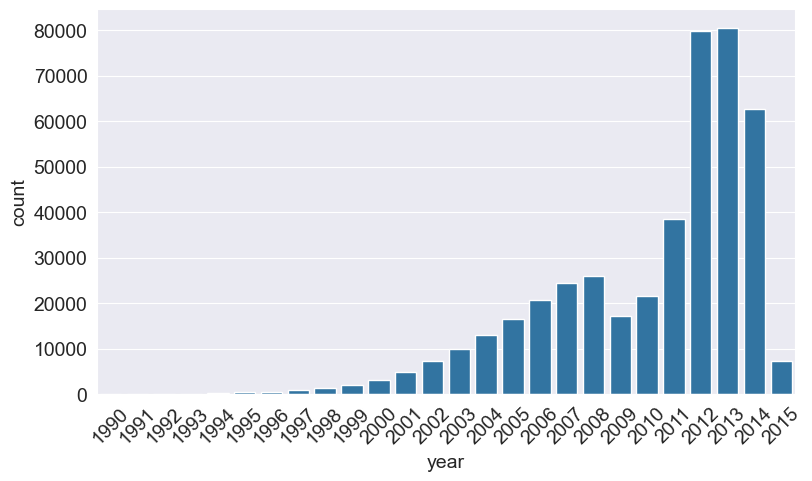

In [90]:
plt.xticks(rotation = 45)
sns.countplot(x=vehicle_df.year)

- ### Year 2013 had the highest number of sales of  80567

## **Asking and Answering Specific Questions**

#### *How does vehicle condition impact the selling price?*

In [94]:
correlation = vehicle_df['condition'].corr(vehicle_df['sellingprice'])
print(f"Correlation between condition and selling price: {correlation}")


Correlation between condition and selling price: 0.31405081812037694


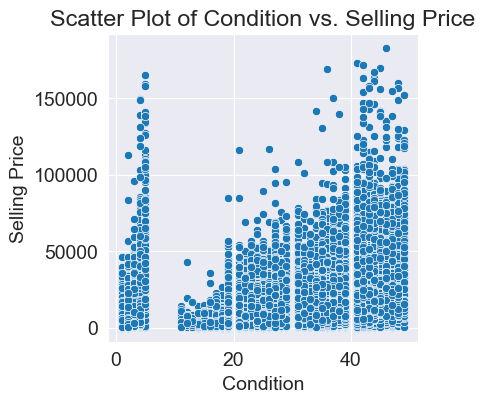

In [61]:
plt.figure(figsize = (4,4))
sns.scatterplot(x='condition', y='sellingprice', data=vehicle_df)
plt.xlabel('Condition')
plt.ylabel('Selling Price')
plt.title('Scatter Plot of Condition vs. Selling Price')
plt.show()


In [56]:
for category in labels:
    print(f"\nCategory: {category}")
    print(vehicle_df[vehicle_df['condition_category'] == category].describe())
    print(vehicle_df[vehicle_df['condition_category'] == category][['condition', 'sellingprice']].head(20))


Category: poor
               year     condition       odometer            mmr   sellingprice
count  54744.000000  54744.000000   54744.000000   54744.000000   54744.000000
mean    2009.905816      3.121219   67295.044644   13757.148729   13137.702725
std        5.094827      1.263674   66357.304622   10501.698022   10766.707400
min     1990.000000      1.000000       1.000000      25.000000     100.000000
25%     2007.000000      2.000000   19577.250000    5675.000000    4500.000000
50%     2012.000000      3.000000   41468.500000   12800.000000   12000.000000
75%     2014.000000      4.000000  104323.250000   18700.000000   18400.000000
max     2015.000000      5.000000  999999.000000  176000.000000  165000.000000
    condition  sellingprice
0         5.0       21500.0
1         5.0       21500.0
5         1.0       10900.0
7         2.0        9800.0
9         3.0       17500.0
12        2.0       12000.0
13        5.0       21500.0
15        2.0       14100.0
32        5.0       2

In [62]:
avg_sellingprice_by_condition = vehicle_df.groupby('condition_category')['sellingprice'].mean()
avg_sellingprice_by_condition

C:\Users\use\AppData\Local\Temp\ipykernel_3700\3427197259.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_sellingprice_by_condition = vehicle_df.groupby('condition_category')['sellingprice'].mean()


condition_category
poor         13137.702725
bad           5037.914486
average       9112.978642
good         13718.217170
excellent    19116.832329
Name: sellingprice, dtype: float64

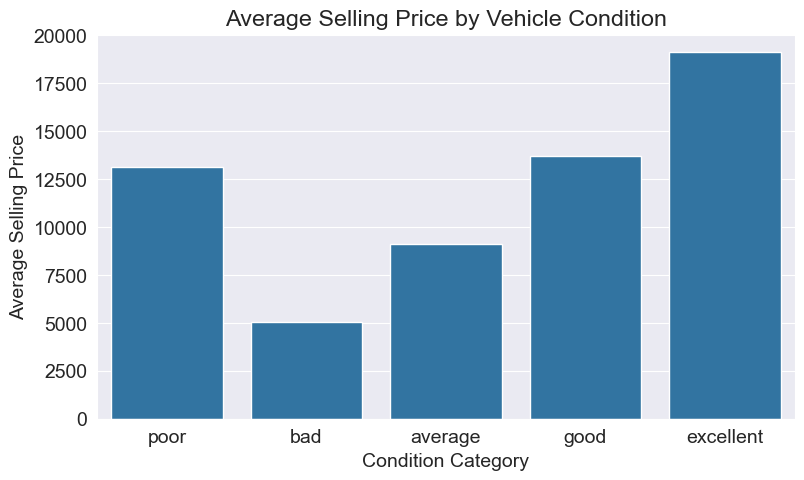

In [57]:
sns.barplot(x=avg_sellingprice_by_condition.index, y=avg_sellingprice_by_condition.values)
plt.xlabel('Condition Category')
plt.ylabel('Average Selling Price')
plt.title('Average Selling Price by Vehicle Condition')
plt.show()

- #### Using this analysis, it is evident that the condtion weakly affects selling price. Therefore, other factors significantly affect the selling price.

#### *How do selling prices vary by vehicle age and condition combined?*

In [20]:
grouped_df = vehicle_df.groupby(['age_category', 'condition_category'])['sellingprice'].mean().reset_index()
grouped_df
# Pivot the DataFrame for easier visualization
pivot_table = grouped_df.pivot(index = 'age_category', columns ='condition_category', values = 'sellingprice')
pivot_table

C:\Users\use\AppData\Local\Temp\ipykernel_7444\1350675261.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = vehicle_df.groupby(['age_category', 'condition_category'])['sellingprice'].mean().reset_index()


condition_category,poor,bad,average,good,excellent
age_category,,,,,
0-5,NaN,NaN,NaN,NaN,NaN
6-10,23580.699601,15592.982456,20735.340502,24808.592233,28212.920443
11-15,17719.887103,10357.286105,13585.144554,16019.724240,19833.047331
16-20,6321.026344,4804.797894,6916.545156,9513.877764,13156.038678
20+,1709.141890,2106.394240,3282.110308,4872.020413,7503.332759


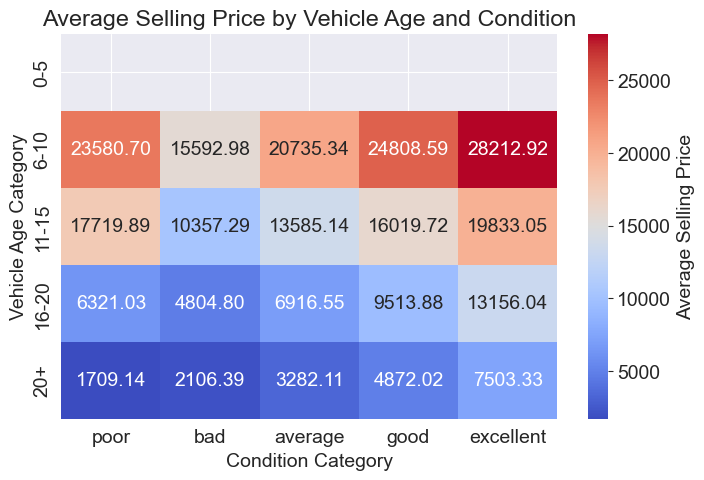

In [26]:
plt.figure(figsize=(8,5))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Average Selling Price'})
plt.title('Average Selling Price by Vehicle Age and Condition')
plt.xlabel('Condition Category')
plt.ylabel('Vehicle Age Category')
plt.show()

- ### Observation
1. The highest selling price is 28,212.92 for the 6-10 age category in the "excellent condition".
2. The lowest selling price is 1,709.14 for the 20+ age category in the "poor" condition.


#### *What are the most common vehicle colors in the dataset?*

##### **Top ten most common colors in the dataframe with the highest average selling price**

In [71]:
top_colors = vehicle_df['color'].value_counts().head(10).index
result = vehicle_df[vehicle_df['color'].isin(top_colors)].groupby('color')['sellingprice'].mean().sort_values()
result

color
gold         8709.931894
green        8858.383725
beige        9529.006857
blue        11545.391346
silver      11894.955285
burgundy    12209.822496
red         12929.105195
gray        13935.963944
white       14860.191172
black       15476.554885
Name: sellingprice, dtype: float64

##### **Top ten colors with the highest average selling price**

In [68]:
vehicle_df.groupby('color')['sellingprice'].mean().nlargest(10)

color
charcoal     16208.943529
black        15476.554885
brown        15447.339119
off-white    15383.957758
white        14860.191172
gray         13935.963944
lime         13668.181818
orange       13164.562902
red          12929.105195
yellow       12851.066038
Name: sellingprice, dtype: float64

- ### In conclusion, we can see that though black occurs the most in the data frame, Charcoal is the color with the highest mean average selling price of 16208.94

#### *How does the market value estimate (MMR) compare to actual selling prices?*

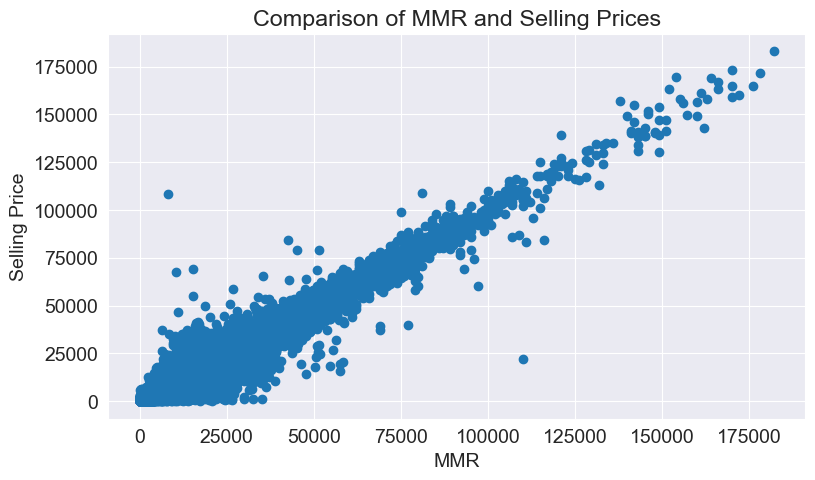

In [95]:
plt.scatter(vehicle_df['mmr'], vehicle_df['sellingprice'])
plt.xlabel('MMR')
plt.ylabel('Selling Price')
plt.title('Comparison of MMR and Selling Prices')
plt.show()

- ### According to the scatter plot, we can see that mmr and selling price as strongly positively correlated

#### *Price vs. Mileage Analysis?*

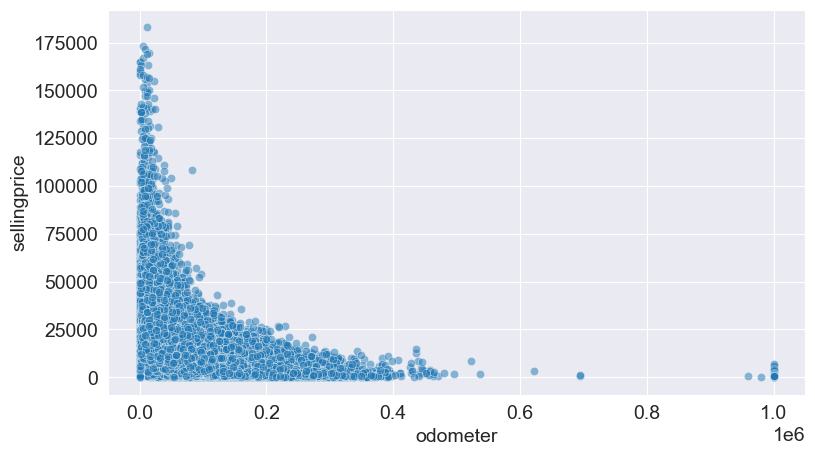

In [91]:
sns.scatterplot(x = vehicle_df.odometer , y =vehicle_df.sellingprice, alpha= 0.5);

<Axes: xlabel='odometer', ylabel='sellingprice'>

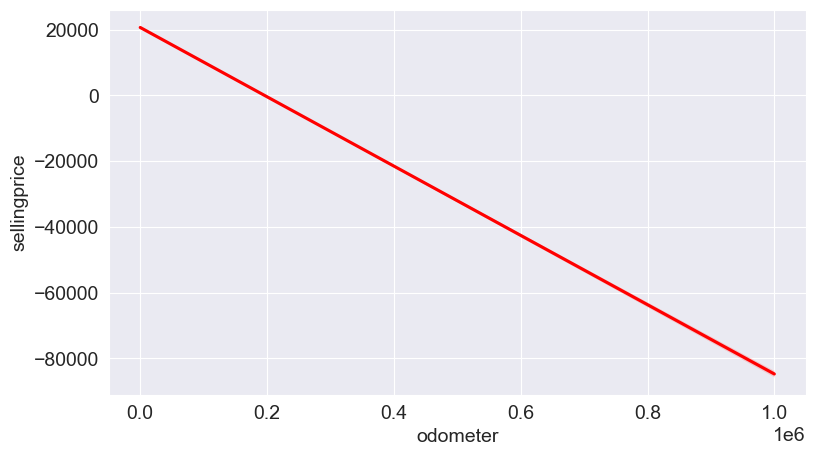

In [92]:
sns.regplot(x='odometer', y='sellingprice', data=vehicle_df, scatter=False, color='red')  # Adds regression line

- You can see if there's a trend, such as a decrease in selling price with an increase in mileage.
- The regression line would help quantify the relationship between mileage and price.

#### *Which states have the highest and lowest average selling prices?*

In [129]:
vehicle_df.groupby('state')['sellingprice'].mean().sort_values(ascending = False).head(5)

state
tn    16728.006972
nv    16308.754582
co    15647.669595
il    15450.910366
mi    15201.664428
Name: sellingprice, dtype: float64

- ### Tennessee, Nevada, Colorado, IIIinios, Michigan are the states with the highest average selling price

In [132]:
vehicle_df.groupby('state')['sellingprice'].mean().sort_values().head(5)

state
ma    6801.042180
nm    7102.816901
ok    7438.461538
md    7708.266985
va    8378.253803
Name: sellingprice, dtype: float64

- #### Massachusetts, New Mexico, Oklahoma, Maryland, Virginia

#### *What model of vehicle has the highest selling price*

In [142]:
vehicle_df.groupby('model')['sellingprice'].mean().sort_values(ascending = False)

model
458 Italia        183000.000000
SLS AMG GT        156500.000000
i8                154222.222222
Ghost             153886.666667
California        134363.636364
                      ...      
Tempo                333.333333
Tracer               312.500000
Spirit               300.000000
Windstar Cargo       258.333333
Paseo                150.000000
Name: sellingprice, Length: 765, dtype: float64

- ### The vehicle of 458 Italia has the highest average selling price of 183000

## **Inferences and Conclusion**

1. ##### High mileage (odometer) tends to negatively impact both the market value and selling price.
   ##### MMR, as a market valuation metric, aligns very closely with actual selling prices, showing that it is a reliable indicator in this dataset.

2. ##### There correlation between price and condition is weak as vehicles in the poor condition category has a higher mean selling price than that of the average conditon category 

3. ##### Massachusetts is the state with the lowest average selling price while Tennessee is the state with the highest average selling price

4. ##### The highest selling price is 28,212.92 for the 6-10 vehicle age category in the "excellent condition". 
   ##### The lowest selling price is 1,709.14 for the 20+ vehicle age category in the "poor" condition.

5. ##### Though black occurs the most in the data frame, Charcoal is the color with the highest mean average selling price of 16208.94

6. ##### The vehicle of 458 Italia model has the highest average selling price of 183000